# **People Analytics: Employee Job Satisfaction Analysis to Improve Retention and Productivity**

by Fitri Wulan Darojati

## **Data Preparation**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

In [2]:
# Read Data
df = pd.read_csv("assignment_employee_survey.csv")

df.head()

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,2.50,2,1,7.60,Car,20,3,12,0,Bachelor,True,33.50,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,1.80,2,2,7.90,Car,15,4,11,0,Bachelor,False,36.00,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,2.10,5,4,6.50,Motorbike,17,0,30,0,Bachelor,True,10.50,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,1.90,3,1,7.50,Public Transport,13,2,9,0,Bachelor,True,23.00,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,1.40,4,2,6.20,Car,8,3,13,0,Bachelor,False,35.00,5


## **Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

In [4]:
# Data cleaning; Mengubah tipe data emp_id

df['emp_id'] = df['emp_id'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   object 
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

In [5]:
df.describe()

,age,experience,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_distance,num_companies,team_size,num_reports,training_hours_per_year,job_satisfaction
count,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00,2766.00
mean,35.65,8.99,3.05,3.03,2.04,2.98,1.74,7.01,13.42,4.22,16.49,2.37,37.22,3.38
std,10.18,7.00,1.45,1.42,0.97,1.41,1.07,1.00,8.34,3.38,6.64,3.06,13.54,1.27
min,22.00,0.00,1.00,1.00,0.00,1.00,1.00,4.00,1.00,0.00,5.00,0.00,10.00,1.00
25%,27.00,3.00,2.00,2.00,1.40,2.00,1.00,6.30,6.00,1.00,11.00,0.00,23.50,3.00
50%,34.00,8.00,3.00,3.00,2.10,3.00,1.00,7.00,13.00,4.00,16.00,0.00,39.50,4.00
75%,43.00,14.00,4.00,4.00,2.70,4.00,2.00,7.70,20.00,7.00,22.00,5.00,46.50,4.00
max,60.00,29.00,5.00,5.00,5.00,5.00,5.00,10.00,29.00,12.00,30.00,9.00,64.50,5.00


## **EDA**

**Question** <br>
1). Bagaimana distribusi job satisfaction di antara karyawan? <br>
2). Apakah keseimbangan work-life-balance (wlb) dan work environment memengaruhi tingkat kepuasan kerja? <br>
3). Apakah tingkat pendidikan memengaruhi job satisfaction? <br>
4). Departemen apa yang memiliki rata-rata job_satisfaction paling tinggi? <br>
5). Bagaimana stres memengaruhi karyawan di tingkat pekerjaan yang berbeda mempengaruhi kepuasan kerja? <br>
6). Apa hubungan antara job satisfaction dan variabel numerik lainnya? <br>

### **Bagaimana distribusi job satisfaction di antara karyawan?**

C:\Users\Fitri Wulan Darojati\AppData\Local\Temp\ipykernel_40264\2401597116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job_satisfaction', palette='viridis')


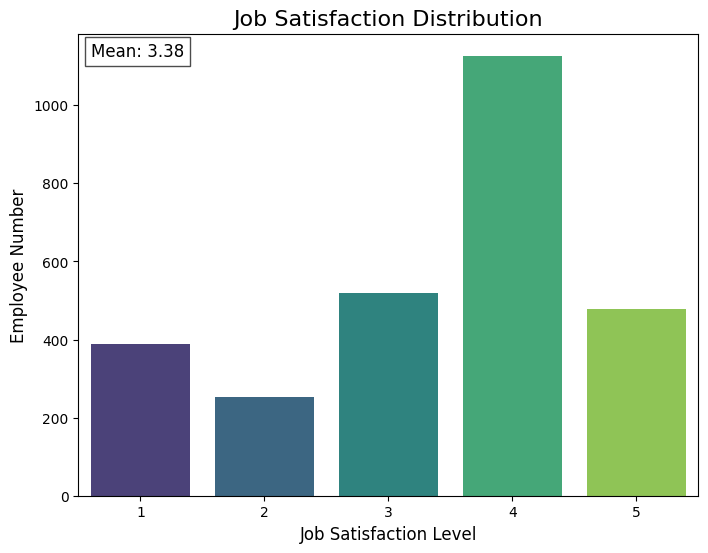

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='job_satisfaction', palette='viridis')

# Menghitung rata-rata job satisfaction
avg_job_satisfaction = df['job_satisfaction'].mean()

# Menambahkan textbox ke dalam plot
plt.text(x=-0.4,
         y=plt.gca().get_ylim()[1] * 0.95,
         s=f"Mean: {avg_job_satisfaction:.2f}",
         fontsize=12,
         color='black',
         bbox=dict(facecolor='white', alpha=0.7))

plt.title('Job Satisfaction Distribution', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Employee Number', fontsize=12)
plt.show()

### **Apakah keseimbangan work-life-balance (wlb) dan work environment memengaruhi tingkat kepuasan kerja?**

C:\Users\Fitri Wulan Darojati\AppData\Local\Temp\ipykernel_40264\1040345302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job_satisfaction', y='wlb', palette='viridis', ax=axes[0])
C:\Users\Fitri Wulan Darojati\AppData\Local\Temp\ipykernel_40264\1040345302.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='job_satisfaction', y='work_env', palette='cool', ax=axes[1])


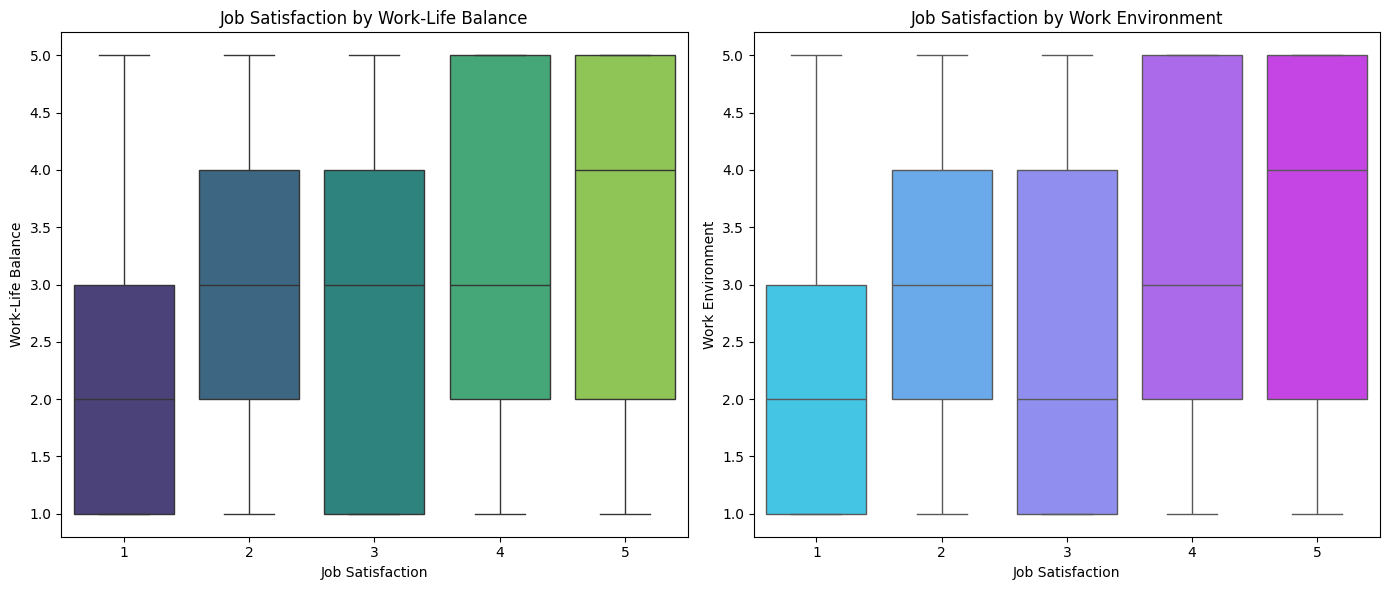

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Subplot 1
sns.boxplot(data=df, x='job_satisfaction', y='wlb', palette='viridis', ax=axes[0])
axes[0].set_title('Job Satisfaction by Work-Life Balance')
axes[0].set_ylabel('Work-Life Balance')
axes[0].set_xlabel('Job Satisfaction')

# Subplot 2
sns.boxplot(data=df, x='job_satisfaction', y='work_env', palette='cool', ax=axes[1])
axes[1].set_title('Job Satisfaction by Work Environment')
axes[1].set_ylabel('Work Environment')
axes[1].set_xlabel('Job Satisfaction')

plt.tight_layout()
plt.show()

### **Apakah tingkat pendidikan memengaruhi job satisfaction?**

C:\Users\Fitri Wulan Darojati\AppData\Local\Temp\ipykernel_40264\3963345885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='edu_level', y='job_satisfaction', palette='PuRd')


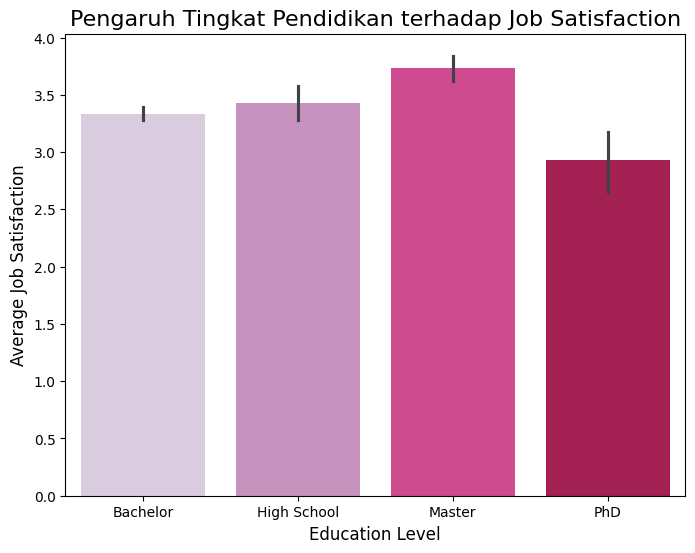

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='edu_level', y='job_satisfaction', palette='PuRd')
plt.title('Pengaruh Tingkat Pendidikan terhadap Job Satisfaction', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Job Satisfaction', fontsize=12)
plt.show()

### **Departemen apa yang memiliki rata-rata job_satisfaction paling tinggi?**

C:\Users\Fitri Wulan Darojati\AppData\Local\Temp\ipykernel_40264\2332531602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_mean.index, y=dept_mean.values, palette='viridis')


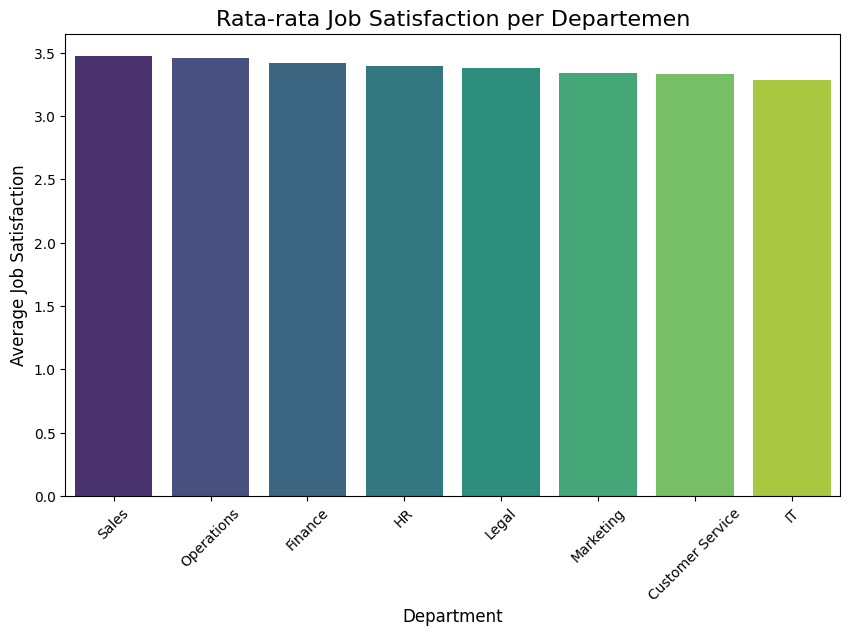

In [9]:
# Menghitung rata-rata
dept_mean = df.groupby('dept')['job_satisfaction'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=dept_mean.index, y=dept_mean.values, palette='viridis')
plt.title('Rata-rata Job Satisfaction per Departemen', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Job Satisfaction', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### **Bagaimana stres memengaruhi karyawan di tingkat pekerjaan yang berbeda mempengaruhi kepuasan kerja?**

<Figure size 800x600 with 0 Axes>

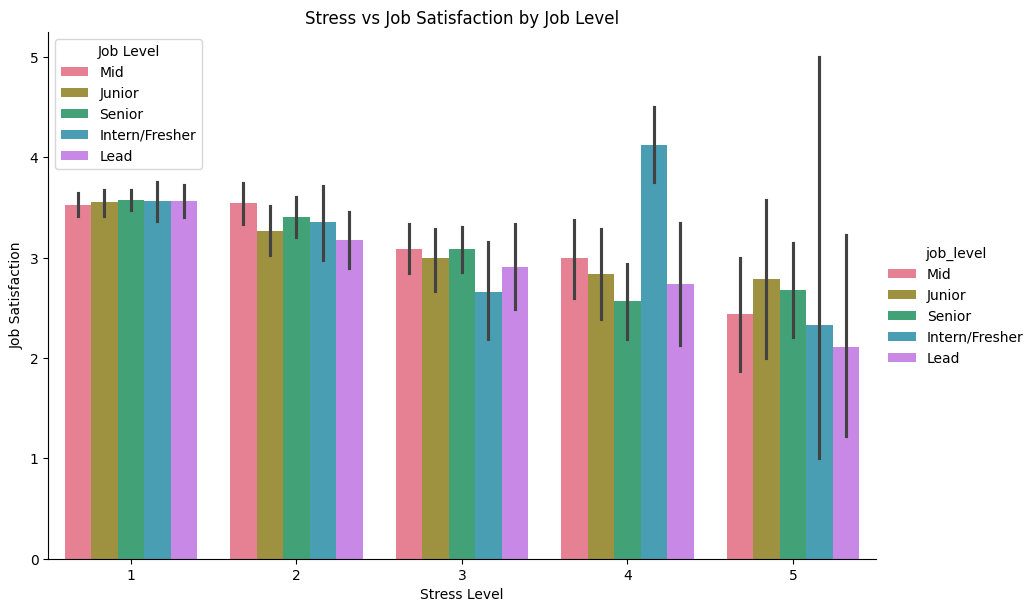

In [10]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='stress', y='job_satisfaction', hue='job_level', kind='bar', height=6, aspect=1.5, palette="husl")
plt.title('Stress vs Job Satisfaction by Job Level')
plt.xlabel('Stress Level')
plt.ylabel('Job Satisfaction')
plt.legend(title='Job Level')
plt.show()

### **Bagaimana hubungan antara job satisfaction dan variabel (numerik) lainnya?**

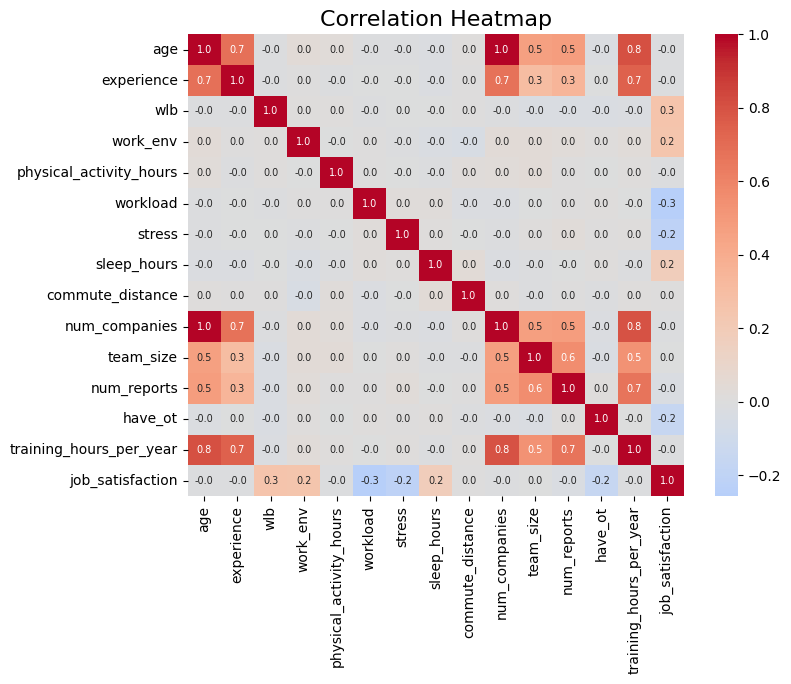

In [11]:
# Menghitung korelasi
correlation_matrix = df.select_dtypes(exclude='object').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            fmt=".1f",
            annot=True,
            annot_kws={"fontsize": 7},
            )

plt.title('Correlation Heatmap', fontsize=16)
plt.show()